In [1]:
%load_ext autoreload
%autoreload 2

In [51]:
import swyft.lightning as sl

from lensx import pyrofit_lensing_models as plm
from lensx import swyft_models as sm


import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib
from tqdm import tqdm

from plot import *
imkwargs = dict(extent=(-2.5, 2.5, -2.5, 2.5), origin='lower') #left, right, bottom, top
DEVICE = 'cuda'

hallo


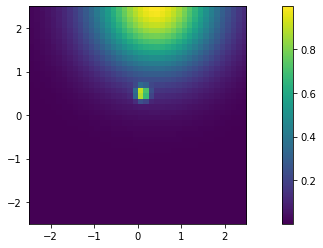

In [49]:
m = plm.Blobs()

subN_kwargs = dict(x = (0.1, 0.4), 
                   y = (0.5, 2.5), 
                   log10_M = (10., 11.))

plt_imshow(m(subN_kwargs).unsqueeze(0).cpu().numpy(), cbar = True, y = 4, **imkwargs)

In [56]:
m = sm.ModelBlobs(sigma_n = 0., n_pix = 40)

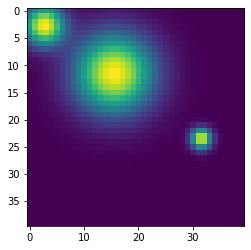

In [66]:
plt.imshow(m.gen_mock()['mu'].cpu() )

In [60]:
m.sample(1)['mu']

100%|██████████| 1/1 [00:00<00:00, 3118.44it/s]


tensor([[[3.5013e-06, 6.3500e-05, 7.5218e-04,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [7.7878e-06, 1.4124e-04, 1.6730e-03,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [1.1313e-05, 2.0518e-04, 2.4304e-03,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         ...,
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.3750e-12,
          4.0577e-14, 3.0513e-16],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.8016e-13,
          2.1661e-15, 1.6289e-17],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 6.0153e-15,
          7.2321e-17, 5.4385e-19]]])

100%|██████████| 2/2 [00:00<00:00, 2017.46it/s]


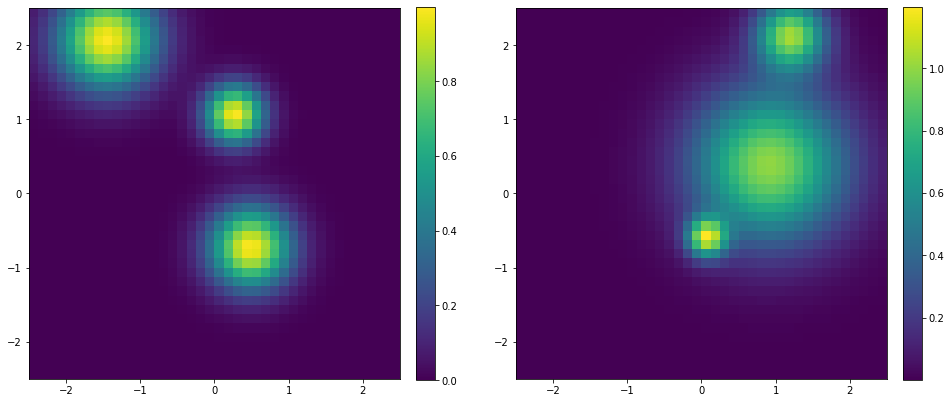

In [59]:
plt_imshow(m.sample(2)['img'], cbar = True, **imkwargs)

In [3]:
nsub = 5
nmc = 3
L = n_pix = 40
sub_low_init = np.array([-2.5, -2.5])
sub_high_init = np.array([2.5, 2.5])
low = sub_low_init[:-1]
high = sub_high_init[:-1]
sigma_n = 0.0

In [7]:
m = ModelSubPos()
m.sample(4)

100%|██████████| 4/4 [00:00<00:00, 7619.08it/s]


{'img': tensor([[[ 0.0660,  0.5204, -0.2035,  ...,  1.2144,  1.0661,  1.0563],
          [ 0.1101,  0.3480,  0.3120,  ...,  1.4258,  1.0045,  0.8794],
          [-0.0095,  0.5598,  0.8944,  ...,  1.5926,  1.1084,  1.2706],
          ...,
          [ 1.2785,  0.9279,  0.8577,  ...,  0.8208,  0.6827,  0.2467],
          [ 1.7028,  1.5709,  1.6821,  ..., -0.2096,  0.4557, -0.1744],
          [ 0.9997,  1.0625,  1.3968,  ..., -0.2395,  0.2173,  0.4657]],
 
         [[ 0.0362,  0.0411,  0.4852,  ...,  1.6436,  0.7077,  1.2335],
          [ 0.3384,  0.2781,  0.2869,  ...,  1.2859,  1.5160,  1.1157],
          [ 0.7688,  0.4965,  0.5811,  ...,  1.0988,  1.0245,  1.5556],
          ...,
          [ 1.1638,  1.5176,  1.7462,  ..., -0.0437,  0.1140,  0.4434],
          [ 0.9484,  1.2064,  1.6016,  ...,  0.7917,  0.0670,  0.3306],
          [ 1.5667,  0.5976,  0.8943,  ...,  0.4755,  0.1881,  0.5210]],
 
         [[-0.1857,  0.2198,  0.2726,  ...,  0.9744,  0.8837,  1.5421],
          [ 0.1650,  

[-0.2 -0.2  0.   0.2  1. ]
4 5
[-0.05 -0.05]
4 2
[ 8.  -2.1 -2.1]
4 3
[-0.1 -0.1  0.   0.   0.   0.1  0. ]
4 7
7.0
4 1


  0%|          | 0/4 [00:00<?, ?it/s]

tensor([ 9.7279, -0.2340, -1.3303])
z_sub tensor([ 9.7279, -0.2340, -1.3303])


IndexError: Dimension out of range (expected to be in range of [-2, 1], but got -3)

In [175]:
# m = ModelSubPos(n_pix=n_pix, sigma_n=sigma_n, 
#                  sub_low_init=sub_low_init, sub_high_init=sub_high_init
#                 )
# s_examples = m.sample(4)


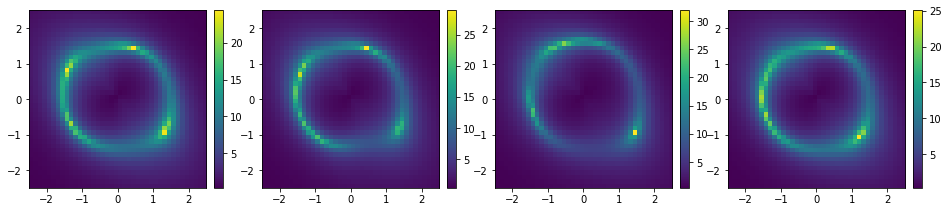

In [92]:
plt_imshow( s_examples['img'],
           scatter = s_examples['z_sub'],
           cbar = True, **imkwargs )

In [93]:
for k, v in s_examples.items():
    print(k, v.shape)

img torch.Size([4, 40, 40])
z_sub torch.Size([4, 5, 3])
mu torch.Size([4, 40, 40])


In [6]:
paramtrans = sl.CustomParameterTransform(nsub, nmc, L, low, high)

In [167]:
s0 = m.sample(1)

  0%|          | 0/1 [00:00<?, ?it/s]


NameError: name '_make_dict_subs' is not defined

In [52]:
target = paramtrans(s0['z_sub']).squeeze(0).cpu().numpy()

In [78]:
x = y = np.arange(n_pix)
zlabels = np.round(np.log10(np.logspace(10., 12., 7)[::3]), 2)
z = np.arange(nmc)
data_value = np.transpose(target, [1, 2, 0])
zlabels

array([10., 11., 12.])

In [63]:
def normalize(d):
    d -= d.min()
    d /= d.max()
    return d

(40, 40, 3)


100%|██████████| 40/40 [00:10<00:00,  3.88it/s]


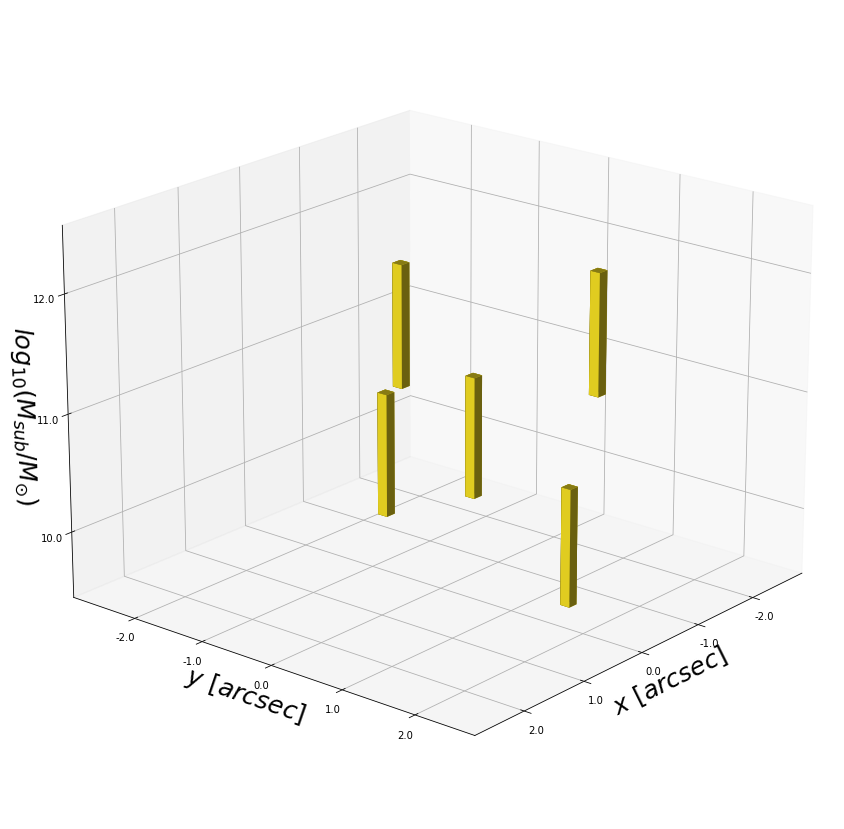

In [86]:
azims = [40.]
# azims = [10.]

print(data_value.shape)

fig = plt.figure(figsize=(18,15))

for i, azim in enumerate(azims):
    ax = fig.add_subplot(1, 1, i+1, projection='3d')
    plotMatrix(ax, x, y, z, data_value)

#     ax.scatter(*scatter, marker = 'x', color = 'red', s = 100)

    ax.view_init(elev=20., azim=azim)

    labelsize = 25
    ax.set_xlabel(r'$x\ [arcsec]$', fontsize = labelsize)
    ax.set_ylabel(r'$y\ [arcsec]$', fontsize = labelsize)
    ax.set_zlabel(r'$log_{10}(M_{sub}/M_{\odot})$', fontsize = labelsize)

    ax.set_xticks(np.linspace(0, L, 11)[1::2])
    ax.set_xticklabels(np.linspace(-2.5, 2.5, 11)[1::2])
    ax.set_yticks(np.linspace(0, L, 11)[1::2])
    ax.set_yticklabels(np.linspace(-2.5, 2.5, 11)[1::2])
    ax.set_zticks(z)
    ax.set_zticklabels(zlabels)





# fig.subplots_adjust(right=0.8)
# ax_cb = fig.add_axes([0.85, 0.15, 0.02, 0.7])

# norm = matplotlib.colors.Normalize(vmin=data_value.min(), vmax=data_value.max())
# cbar = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=plt.cm.viridis,
#                                 norm=norm,
#                                 orientation='vertical')  

# plt.savefig(f'figs/lava_{plot_name}.png',bbox_inches='tight')
plt.show()

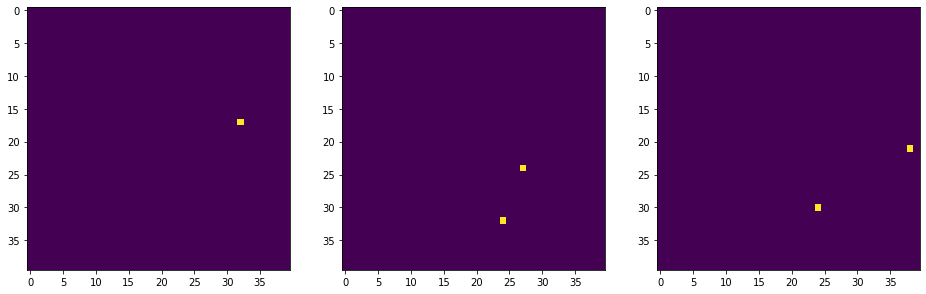

In [25]:
plt_imshow(target)

In [21]:
def cuboid_data(center, size=(1,1,1)):
    # code taken from
    # http://stackoverflow.com/questions/30715083/python-plotting-a-wireframe-3d-cuboid?noredirect=1&lq=1
    # suppose axis direction: x: to left; y: to inside; z: to upper
    # get the (left, outside, bottom) point
    o = [a - b / 2 for a, b in zip(center, size)]
    # get the length, width, and height
    l, w, h = size
    x = [[o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in bottom surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in upper surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in outside surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]]]  # x coordinate of points in inside surface
    y = [[o[1], o[1], o[1] + w, o[1] + w, o[1]],  # y coordinate of points in bottom surface
         [o[1], o[1], o[1] + w, o[1] + w, o[1]],  # y coordinate of points in upper surface
         [o[1], o[1], o[1], o[1], o[1]],          # y coordinate of points in outside surface
         [o[1] + w, o[1] + w, o[1] + w, o[1] + w, o[1] + w]]    # y coordinate of points in inside surface
    z = [[o[2], o[2], o[2], o[2], o[2]],                        # z coordinate of points in bottom surface
         [o[2] + h, o[2] + h, o[2] + h, o[2] + h, o[2] + h],    # z coordinate of points in upper surface
         [o[2], o[2], o[2] + h, o[2] + h, o[2]],                # z coordinate of points in outside surface
         [o[2], o[2], o[2] + h, o[2] + h, o[2]]]                # z coordinate of points in inside surface
    return np.array((x, y, z))

def plotCubeAt(pos=(0,0,0), c="b", alpha=1, ax=None):
    # Plotting N cube elements at position pos
    if ax !=None:
        X, Y, Z = cuboid_data( (pos[0],pos[1],pos[2]) )
        ax.plot_surface(X, Y, Z, color=c, rstride=1, cstride=1, alpha=alpha)

def plotMatrix(ax, x, y, z, data, cmap=plt.cm.viridis, cax=None, alpha=1):
    # plot a Matrix 
    norm = matplotlib.colors.Normalize(vmin=data.min(), vmax=data.max())
    colors = lambda i,j,k : matplotlib.cm.ScalarMappable(norm=norm,cmap = cmap).to_rgba(data[i,j,k]) 
    alphas = lambda i,j,k : normalize(data)[i,j,k] 
    for i, xi in enumerate(tqdm(x)):
            for j, yi in enumerate(y):
                for k, zi, in enumerate(z):
                    plotCubeAt(pos=(xi, yi, zi), c=colors(i,j,k), alpha=alphas(i,j,k),  ax=ax)

In [15]:
grid_low = (-2.5, -2.5)
grid_high = (2.5, 2.5)
grid_n = (2, 2)

In [16]:
density = torch.full(grid_n, 0.3, device = DEVICE)
density

tensor([[0.3000, 0.3000],
        [0.3000, 0.3000]], device='cuda:0')

In [21]:
random_drawn = torch.rand(size = density.shape, device = DEVICE)
random_drawn

tensor([[0.9041, 0.0933],
        [0.1293, 0.4117]], device='cuda:0')

In [22]:
density > random_drawn

tensor([[False,  True],
        [ True, False]], device='cuda:0')

In [118]:
prior = np.full((10,), 0.1)
prior

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [124]:
rand_draw = np.random.uniform(low = 0., high = 1., size = (10,))
rand_draw

array([0.72676801, 0.34804893, 0.08796454, 0.89678269, 0.48250431,
       0.28803995, 0.70254305, 0.79697735, 0.0284157 , 0.65111157])

In [142]:
drawn_target = (prior > rand_draw)

In [132]:
drawn_target

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [135]:
edges = np.arange(11.)
edges

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [153]:
edges_left, edges_right = edges[:-1], edges[1:]
boundaries = np.stack((edges_left[drawn_target], edges_right[drawn_target]), axis = 1)

array([[2., 3.],
       [8., 9.]])

In [166]:
np.random.uniform(low = (2, 8), high = (3, 9))

array([2.39385357, 8.16070428])

In [143]:
edges_left

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [144]:
drawn_target

array([False, False,  True, False, False, False, False, False,  True,
       False])

In [ ]:
def random(x, p):
    return 

In [113]:
torch.multinomial(prior, 1, replacement=True)

tensor([3])

In [103]:
np.random.choice([0, 1], 10, p = [0.9, 0.1])

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])